## 1. Spatial Methods

In this section, we shall use 2D Convolutions with certain kernel matrices and observe their effects.

In the cell below, read the image file.

In [2]:
import cv2

## YOUR CODE HERE
dir = 'sharif.jpg' # import os if necessary here
## END OF YOUR CODE

img = cv2.imread(dir)
img;

### 1.1 Low-pass Kernel

Using the kernel matrix below and 2D Convolution, blur the original image and plot a "before and after" of the two images side by side. Also save the result image only as `1.1.jpg` and include it in the files you upload.

$$
K_1=
\frac{1}{9} \times
\begin{pmatrix}
    1 & 1 & 1 \\
    1 & 1 & 1 \\
    1 & 1 & 1 \\
\end{pmatrix}
$$

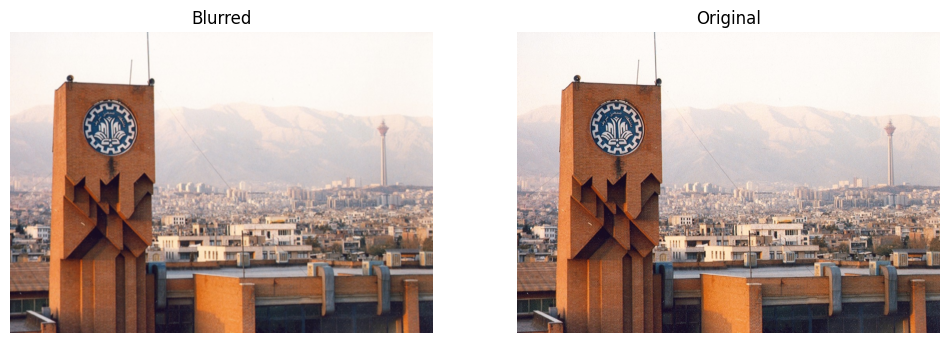

In [81]:
import numpy as np
import matplotlib.pyplot as plt

K_1 = np.array([[1, 1, 1],
                [1, 1, 1],
                [1, 1, 1]]) / 9.0

img_blur = cv2.filter2D(img, -1, K_1)
cv2.imwrite('1.1.jpg', img_blur)

plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_blur,cv2.COLOR_BGR2RGB))
plt.title('Blurred')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')
plt.show()


#### 1.2 High-pass Kernel

Using the kernel matrix below and 2D Convolution, filter the original image and plot a "before and after" of the two images side by side. Also save the result image only as `1.2.jpg` and include it in the files you upload.

$$
K_2=
\begin{bmatrix}
    0 & -1 & 0 \\
    -1 & 4 & -1 \\
    0 & -1 & 0 \\
\end{bmatrix}
$$

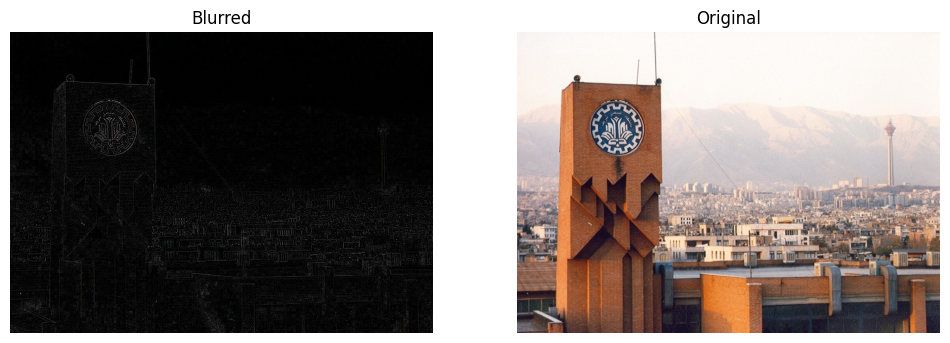

In [82]:
K_2 = np.array([[0, -1, 0],
                [-1, 4, -1],
                [0, -1, 0]])

img_blur = cv2.filter2D(img, -1, K_2)
cv2.imwrite('1.2.jpg', img_blur)

plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_blur,cv2.COLOR_BGR2RGB))
plt.title('Blurred')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')
plt.show()


## 2. Frequency Domain Methods
### 2.1 Representation

Using `numpy.fft.fft2`, show each RGB channel's representation in 2D frequency domain (this amounts to 3 plots). Do not forget to use `numpy.fft.fftshift`!

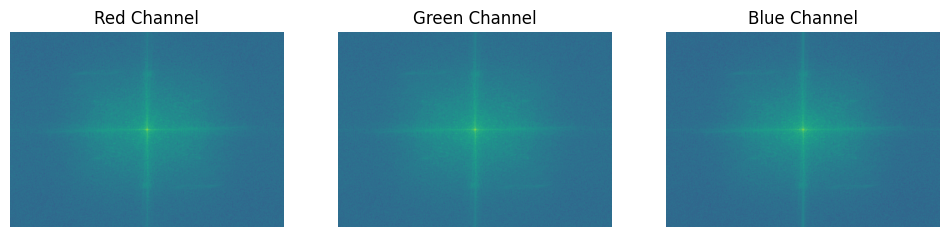

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img_array = np.array(img)

red = img_array[:, :, 0]
green = img_array[:, :, 1]
blue = img_array[:, :, 2]


fft_r = np.fft.fft2(red)
fft_g = np.fft.fft2(green)
fft_b = np.fft.fft2(blue)

fft_r_shifted = np.fft.fftshift(fft_r)
fft_g_shifted = np.fft.fftshift(fft_g)
fft_b_shifted = np.fft.fftshift(fft_b)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

ax1.imshow(np.log1p(np.abs(fft_r_shifted)))
ax1.set_title('Red Channel')
ax1.axis('off')

ax2.imshow(np.log1p(np.abs(fft_g_shifted)))
ax2.set_title('Green Channel')
ax2.axis('off')

ax3.imshow(np.log1p(np.abs(fft_b_shifted)))
ax3.set_title('Blue Channel')
ax3.axis('off')

plt.show()


### 2.2 Butterworth Filter

The Butterworth filter in 1D is defined as such:
$$
G(\omega)=\frac{G_0}{\sqrt{1+(\frac{\omega}{\omega_c})^{2n}}}
$$

where $n$ is the order of filter, $\omega _{c}$ is the cutoff frequency (approximately the −3 dB frequency), and $G_{0}$ is the DC gain (gain at zero frequency). We want a DC gain of 1.

Since you are working in 2D, substitute $\omega$ in the formula with $D=\sqrt{u^2+v^2}$, where $u$ and $v$ represent the frequency domain variables of the image. Using these parameters:

$$
\begin{cases}
n=2, \omega_c =5 \\
n=2, \omega_c =20 \\
n=2, \omega_c =50 \\
n=4, \omega_c =50 \\
n=16, \omega_c =50 \\
\end{cases}
$$

Plot the original image first, then for each case plot the image doing the actions below:

Use a 2D Butterworth low-pass filter on each channel's frequency spectrum, and then bring it back to the spacial domain and plot the blurred image.

A total of 6 images will be your output. You do not have to save the images.

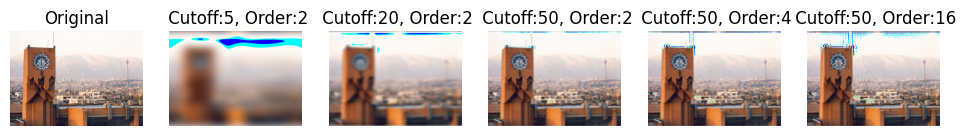

In [47]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

def Butterworth_LP(img, f_c, order):
    
    ft_shifted = np.fft.fftshift(np.fft.fft2(img))
    
    rows, cols = img.shape[:2]
    c_u, c_v = cols // 2, rows // 2
    u, v = np.meshgrid(np.arange(cols), np.arange(rows))
    d = np.sqrt((u - c_u)**2 + (v - c_v)**2)
    
    f_mask = 1 / (1 + (d / f_c)**(2 * order))
    ft = f_mask * ft_shifted
    image = np.abs(np.fft.ifft2(np.fft.ifftshift(ft)))
    
    return image.astype(np.uint8)

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

order = [2, 2, 2, 4, 16]
f_c = [5, 20, 50, 50, 50]
plt.figure(figsize=(12, 12))

plt.subplot(1,6,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")
plt.show

for i in range(5):
    c = f_c[i]
    o = order[i]
    filtered_channels = []
    for j in cv2.split(img):
        filtered_channels.append(Butterworth(j, c, o))
        
    plt.subplot(1,6,2+i)
    plt.imshow(cv2.cvtColor(cv2.merge(filtered_channels), cv2.COLOR_BGR2RGB))
    plt.title(" Cutoff:" + str(c)+ ","+ " Order:"+ str(o))
    plt.axis("off")

plt.show()

### 2.3 Discuss

What do you observe when you increase the cut-off frequency, and what happens when you increase the number of poles (order of the filter) too much?

In the same cutoff when we increase order, the picture is much clear than lower order but we have some noise in edge.
In the same order when we increase cutoff, the picture is much clear than lower cutoff and blue part will disappier and we have better resolution.


### 2.4 Butterworth High-pass Filter

Create the high-pass filter from the butterworth low-pass filter as such:

$$
G_2(\omega)=1-G(\omega)=1-\frac{1}{\sqrt{1+(\frac{\omega}{\omega_c})^{2n}}}
$$

Use this to high-pass filter the image with $\omega_c=10$ and $n=4$. Plot the output. The output must be colored! You do not have to save the image.

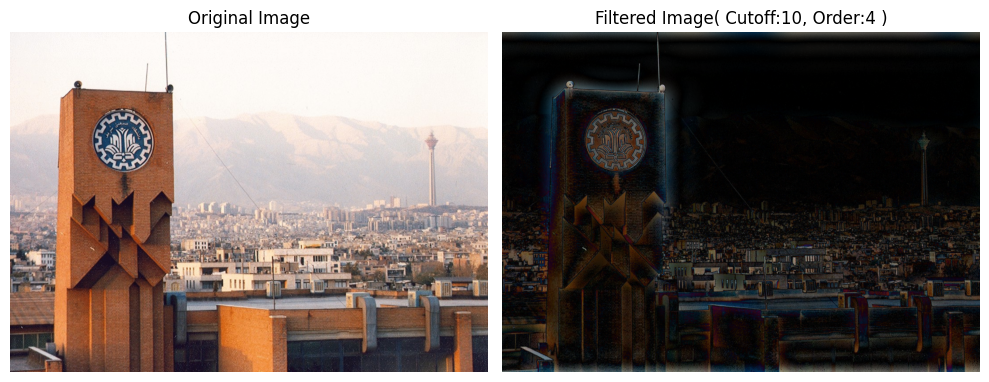

In [61]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

def Butterworth_HP(img, f_c, order):
    
    ft_shifted = np.fft.fftshift(np.fft.fft2(img))
    
    rows, cols = img.shape[:2]
    c_u, c_v = cols // 2, rows // 2
    u, v = np.meshgrid(np.arange(cols), np.arange(rows))
    d = np.sqrt((u - c_u)**2 + (v - c_v)**2)
    
    f_mask = 1 - 1 / (1 + (d / f_c)**(2 * order))
    ft = f_mask * ft_shifted
    image = np.abs(np.fft.ifft2(np.fft.ifftshift(ft)))
    
    return image.astype(np.uint8)

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

o = 4
c = 10
filtered_channels = []

for j in cv2.split(img):
    filtered_channels.append(Butterworth_HP(j, c, o))
        


plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(cv2.merge(filtered_channels), cv2.COLOR_BGR2RGB))
plt.title('Filtered Image' + "(" + " Cutoff:" + str(c)+ ","+ " Order:"+ str(o)+ " )")
plt.axis('off')
plt.tight_layout()
plt.show()

### 2.5 Sharpening

Use the image from the previous part, and add it back to the original image. You must account for clipping by re-normalization in each RGB channel. This action is called high-boosting and the overall effect is sharpening.
$$
I_{result}(x,y)=I{original}(x,y)+\alpha I_{high-pass}(x,y)
$$

You must choose the $\alpha$ parameter accordingly.

Save the image as `2.5.jpg` and include it in the files you upload.

(-0.5, 1077.5, 767.5, -0.5)

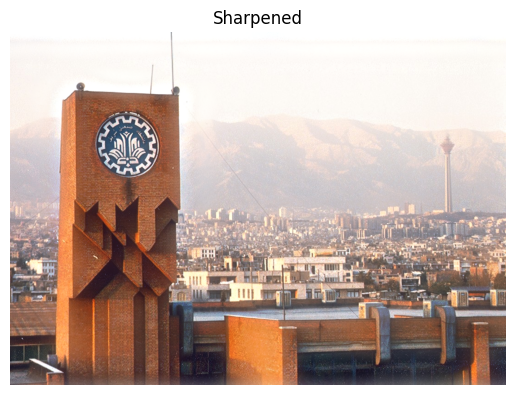

In [101]:
I_HP = cv2.cvtColor(cv2.merge(filtered_channels), cv2.COLOR_BGR2RGB)
I_Ori = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
alpha = 0.42
I_Res = np.clip(I_Ori + alpha * I_HP, 0, 255).astype(np.uint8)
cv2.imwrite('2.5.jpg', cv2.cvtColor(I_Res, cv2.COLOR_BGR2RGB))

plt.imshow(I_Res)
plt.title('Sharpened')
plt.axis('off')

### 2.6 Discuss

Do the image details pop out more? Does the image lose brightness? Why?

Yes, we normalize brighness here and focus on details.yes, here we lose brightness because IHP is literally dark photo.

## 3. Affine Transformations

In this section we want to perform some mapping of each pixel to a new location in the image using affine transformations (matrices). The matrix operates on the locations of the pixels, not the value of each pixel. No images need to be saved in this section, only plot the output.

The matrices operate as if the origin is located in the middle of the image. For some transformations you may have to adjust the size of the image.

### 3.1 Reflection
$$
\begin{bmatrix}
    -1 & 0 \\
    0 & 1 \\
\end{bmatrix}
$$

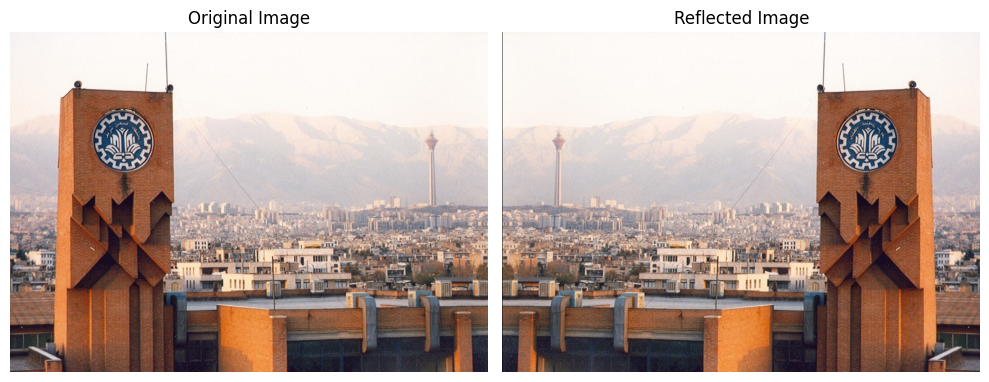

In [96]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
Reflection_mat = np.array([[-1, 0, img.shape[1]],
                           [0, 1, 0]], dtype=np.float32)
image = cv2.warpAffine(img, Reflection_mat, (img.shape[1], img.shape[0]))

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Reflected Image")
plt.axis('off')
plt.tight_layout()
plt.show()

### 3.2 Scale

$$
\begin{bmatrix}
    \alpha & 0 \\
    0 & \beta \\
\end{bmatrix}
$$

Plot for $\alpha=\frac{1}{2}$ and $\beta=1$.

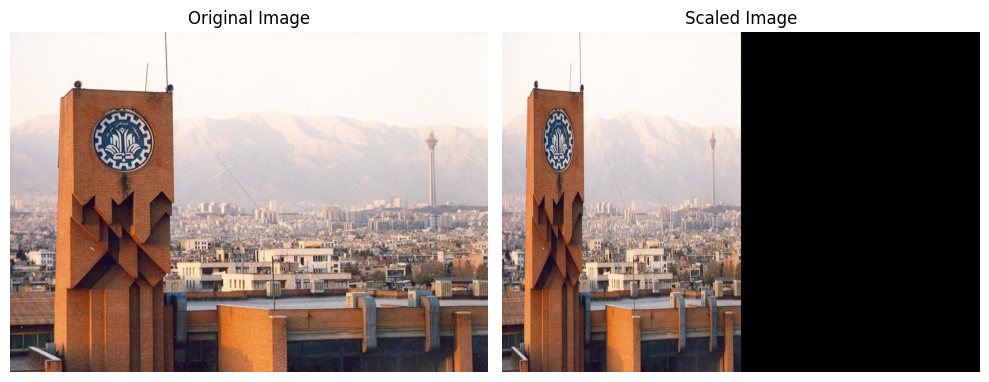

In [88]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
alpha = 0.5
beta = 1
Scale_mat = np.array([[alpha, 0, 0], 
                     [0, beta, 0]], dtype=np.float32)
image = cv2.warpAffine(img, Scale_mat, (img.shape[1], img.shape[0]))

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Scaled Image")
plt.axis('off')
plt.tight_layout()
plt.show()

### 3.3 Rotation

$$
\begin{bmatrix}
    cos(\theta) & sin(\theta) \\
    -sin(\theta) & cos(\theta) \\
\end{bmatrix}
$$

Plot for $\theta = 30^{\circ}$.

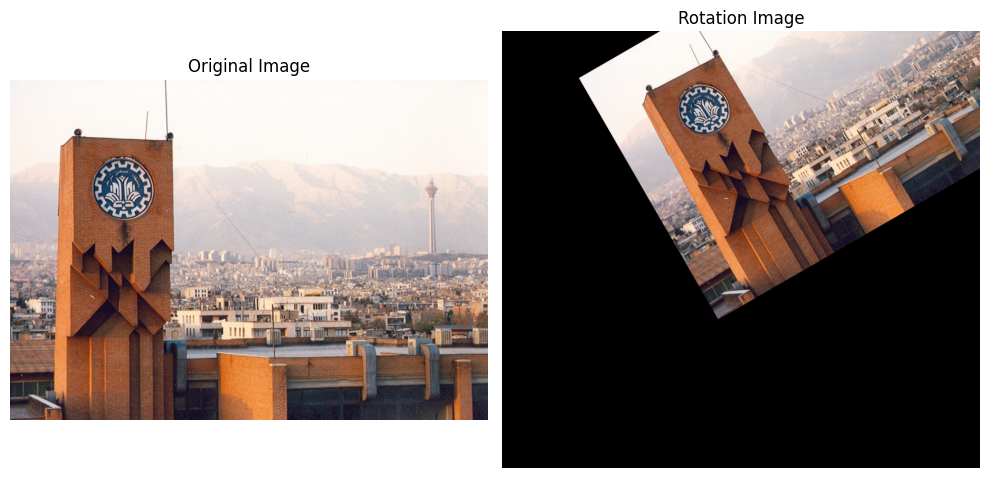

In [95]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math
Theta = math.radians(30)

cos = math.cos(theta_radians)
sin = math.sin(theta_radians)
Rotation_mat = np.array([[cos, sin], 
                         [-sin, cos]], dtype=np.float32)

width = int(img.shape[1] * abs(cos) + img.shape[0] * abs(sin))
height = int(img.shape[1] * abs(sin) + img.shape[0] * abs(cos))
Translation_mat = np.array([[1, 0, (width - img.shape[1]) // 2], 
                            [0, 1, (height - img.shape[0]) // 2]], dtype=np.float32)

image = cv2.warpAffine(img, Rotation_mat.dot(Translation_mat), (width, height))

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Rotation Image")
plt.axis('off')
plt.tight_layout()
plt.show()


### 3.4 Shear


$$
\begin{bmatrix}
    1 & c_x \\
    c_y & 1 \\
\end{bmatrix}
$$

Plot for $c_x=\frac{1}{3}$ and $c_y = 0$.

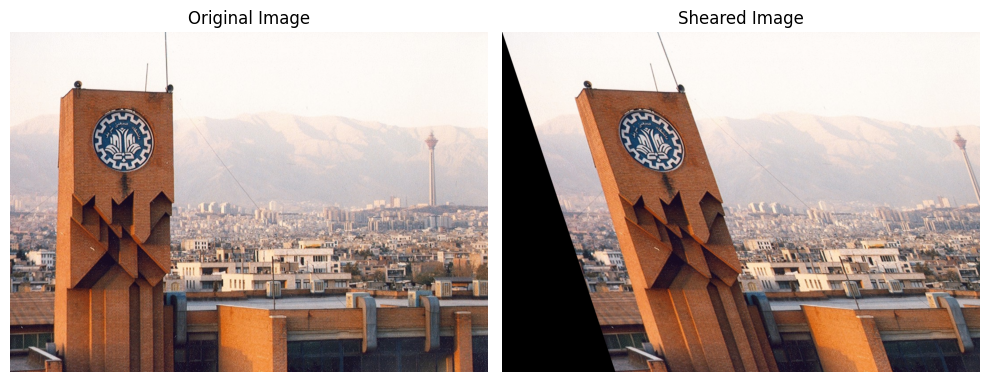

In [100]:
C_x = 1 / 3
C_y = 0
Shear_mat = np.array([[1, C_x, 0], 
                      [C_y, 1, 0]], dtype=np.float32)

image = cv2.warpAffine(img, Shear_mat, (img.shape[1], img.shape[0]))

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Sheared Image")
plt.axis('off')
plt.tight_layout()
plt.show()